In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding_errors='ignore')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.rename(columns={'v1':'type','v2':'msg'},inplace=True)

In [8]:
df.sample(5)

,type,msg
1912,ham,For real tho this sucks. I can't even cook my ...
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
2837,ham,Were trying to find a Chinese food place aroun...
2400,ham,Hi! This is Roger from CL. How are you?
257,ham,Where are you lover ? I need you ...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit_transform(df['type'])

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
df['type']=encoder.fit_transform(df['type'])

In [11]:
df.head()

,type,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isna().sum()         #no missing

type    0
msg     0
dtype: int64

In [13]:
df.duplicated().sum()

404

In [14]:
df=df.drop_duplicates(keep='first')

## Exploratory Data Analytics

In [15]:
df['type'].value_counts()

0    4516
1     652
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x2386540760>,
 [Text(-1.0147253819927426, 0.42465562417055414, 'ham'),
  Text(1.0147254018723058, -0.4246555766678308, 'spam')],
 [Text(-0.5534865719960413, 0.23163034045666586, '87.4'),
  Text(0.5534865828394394, -0.2316303145460895, '12.6')])

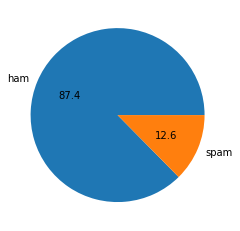

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct='%0.1f')

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
df['num_chars']=df['msg'].apply(len)

In [20]:
df.head(3)

,type,msg,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [21]:
df['num_words']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))         #words

In [22]:
df.head(3)

,type,msg,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [23]:
df['num_sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))      #sentences

In [24]:
df[['num_chars','num_words','num_sentences']].describe()           #total

,num_chars,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.440789,1.962074
std,58.104099,13.325276,1.433418
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['type']==0][['num_chars','num_words','num_sentences']].describe()        

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108503,1.815323
std,56.328803,13.492074,1.363662
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['type']==1][['num_chars','num_words','num_sentences']].describe()          

,num_chars,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.978528
std,29.937352,7.015283,1.492274
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [27]:
#for spam they are more

In [28]:
import seaborn as sns

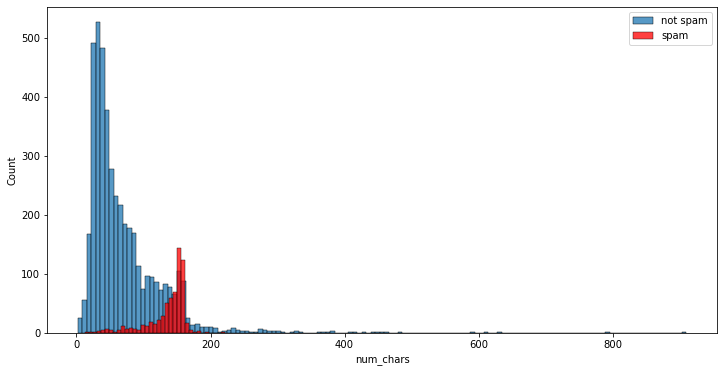

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']==0]['num_chars'],label='not spam')
sns.histplot(df[df['type']==1]['num_chars'],color='red',label='spam')
plt.legend()

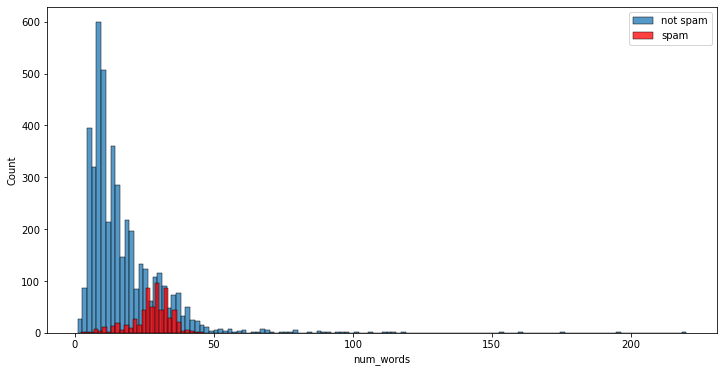

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']==0]['num_words'],label='not spam')
sns.histplot(df[df['type']==1]['num_words'],color='red',label='spam')
plt.legend()

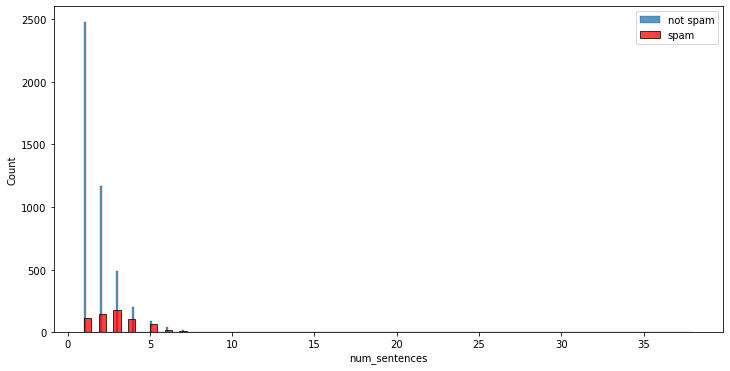

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']==0]['num_sentences'],label='not spam')
sns.histplot(df[df['type']==1]['num_sentences'],color='red',label='spam')
plt.legend()

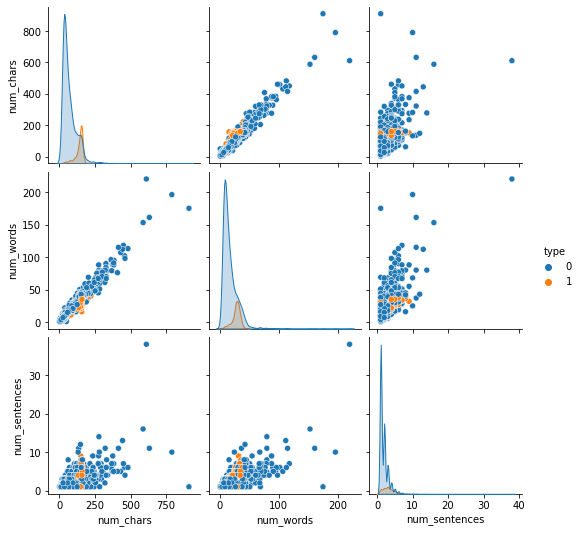

In [32]:
sns.pairplot(df,hue='type')

In [33]:
df.corr()

,type,num_chars,num_words,num_sentences
type,1.000000,0.381208,0.263158,0.269466
num_chars,0.381208,1.000000,0.966359,0.626379
num_words,0.263158,0.966359,1.000000,0.681145
num_sentences,0.269466,0.626379,0.681145,1.000000


<AxesSubplot:>

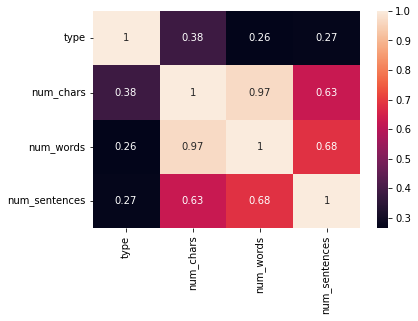

In [34]:
sns.heatmap(df.corr(),annot=True)

## DATA PREPROCESSING

In [35]:
from nltk.corpus import stopwords
import nltk

In [36]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [38]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
transform_text("hi how are you")

'hi'

In [40]:
df['transformed_text']=df['msg'].apply(transform_text)

In [41]:
df.head()

,type,msg,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white',collocations=False)

In [44]:
spam_wc=wc.generate(df[df['type']==1]['transformed_text'].str.cat(sep=" "))

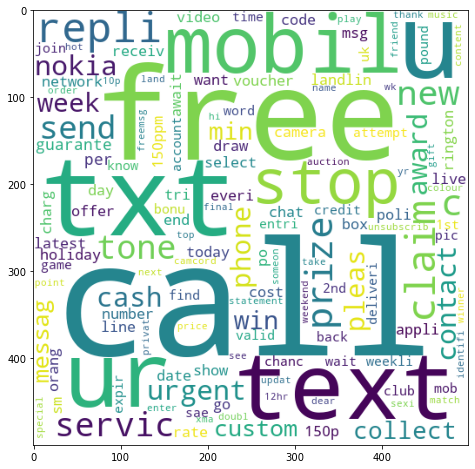

In [45]:
plt.figure(figsize=(14,8))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['type']==0]['transformed_text'].str.cat(sep=" "))

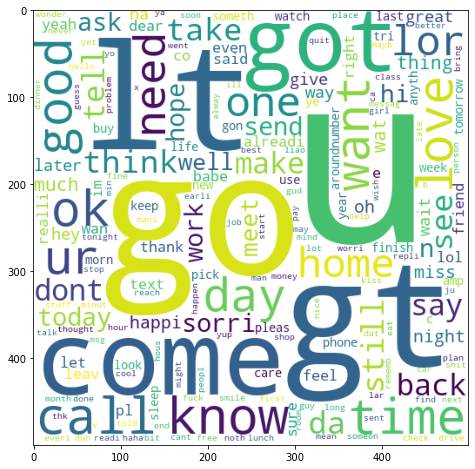

In [47]:
plt.figure(figsize=(14,8))
plt.imshow(ham_wc)

In [48]:
spam_corpus=[]
for msg in df[df['type']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

10106

In [50]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,102


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


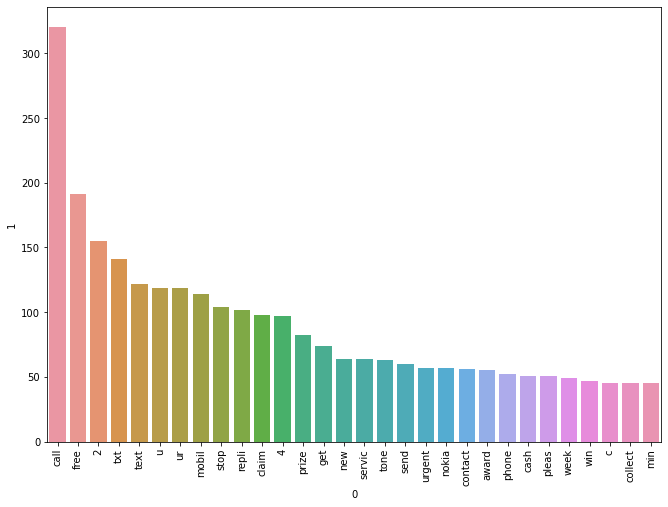

In [51]:
plt.figure(figsize=(11,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [52]:
ham_corpus=[]
for msg in df[df['type']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


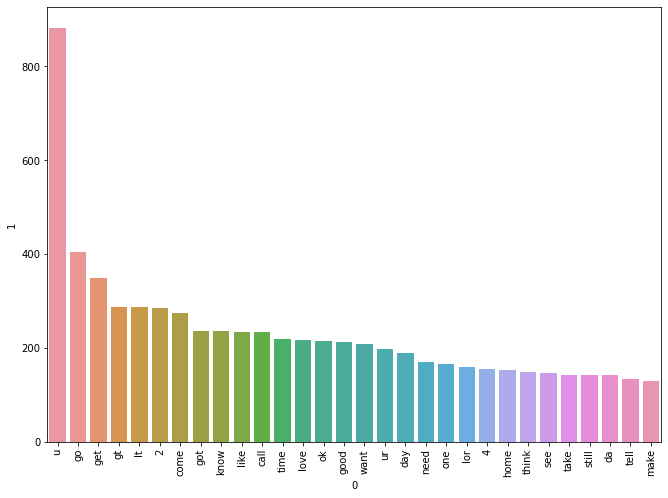

In [53]:
plt.figure(figsize=(11,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

## Model Building

In [76]:
from sklearn.feature_extraction.text import CountVectorizer   #bag of words
cv=CountVectorizer()

In [77]:
X=cv.fit_transform(df['transformed_text']).toarray()           ###########
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
X.shape

(5168, 6704)

In [79]:
y=df['type'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

## DATA imbalance so precision matters most

In [84]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8829787234042553
[[792 101]
 [ 20 121]]
0.545045045045045


In [85]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[868  25]
 [ 13 128]]
0.8366013071895425


In [86]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[890   3]
 [ 33 108]]
0.972972972972973


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer         ##tfidf vectorizer
tfidf=TfidfVectorizer()

In [88]:
X=tfidf.fit_transform(df['transformed_text']).toarray()           ###########
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[792 101]
 [ 26 115]]
0.5324074074074074


In [91]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9535783365570599
[[893   0]
 [ 48  93]]
1.0


## Multinomial NB with idftf vectorizer worked the best.
## ETC and Random Forest also worked better.

# MODEL IMPROVEMENT

In [92]:
#max features
#scaling (minmaxscaler,standard)
#append numchar col to X

In [93]:
#stacking classifier
#voting classifier

## Again MNB with IDFTF vectorizer Works the best.

In [94]:
import pickle

In [95]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))